# EJERCICIOS

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2025-01-09 16:18:44.318958: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 16:18:44.322758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 16:18:44.333747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736435924.350824   13229 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736435924.355720   13229 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 16:18:44.372447: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 
 - 1

¿Qué función de activación deberías usar en la capa de salida? 
 - Sigmoide

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 
 - 10 neuronas (1 neurona por clase), funcion de activacion: Softmax

¿Y si quieres que la red prediga los precios de la vivienda en California?
 - 1 neurona, funcion de activacion: Softmax

## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

#### Obtener, separar datos

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist

#Dividimos los datos completos de entrenamiento en datos de entrenamiento y validación
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape[1:]

(28, 28)

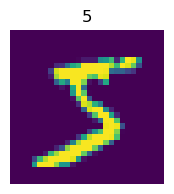

In [4]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0])
plt.axis('off')   # quita los ejes
plt.title(y_train[0])
plt.show()

#### Entrenar varios modelos

In [5]:
# 1 entrada, 2 ocultas y 1 salida de 10 neuronas(1 por clase)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(124, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  
])

2025-01-08 17:16:24.919825: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# creamos carpeta si no existe para guardar los modelos y checkpoint
ruta_dir_mod = './recursos/modelos/4_3_2'
if not os.path.exists(ruta_dir_mod):
    os.mkdir(ruta_dir_mod)
if not os.path.exists('./recursos/checkpoint'):
    os.mkdir('./recursos/checkpoint')


In [7]:
# Si no mejora en 7 iteraciones el modelo para de entrenar
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_3_2_checkpoints.weights.h5", save_weights_only=True)

historys = []
rangos = [1e-4, 5e-4, 7e-4, 1e-3, 3e-3, 5e-3, 1e-2, 3e-2, 5e-2]
for lr in rangos :
    print('Learning rate: ',lr)
    # Se compila el modelo con el optimizador   
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),   # asignar tasa de aprendizaje
              metrics=['accuracy'])
    # entrenar
    hist = model.fit(X_train, y_train, epochs=70, validation_data=(X_valid, y_valid), 
                     callbacks=[checkpoint_cb,early_stopping_cb])
    historys.append(hist)
    
    # guardar
    ruta = "./recursos/modelos/4_3_2/my_keras_model_lr{}.keras".format(lr)
    model.save(ruta)
    print('\n\n')

Learning rate:  0.0001
Epoch 1/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6050 - loss: 16.6637 - val_accuracy: 0.8590 - val_loss: 1.4367
Epoch 2/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8458 - loss: 1.3388 - val_accuracy: 0.8792 - val_loss: 0.6962
Epoch 3/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8751 - loss: 0.6282 - val_accuracy: 0.8958 - val_loss: 0.4491
Epoch 4/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9024 - loss: 0.4112 - val_accuracy: 0.9172 - val_loss: 0.3795
Epoch 5/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9227 - loss: 0.3077 - val_accuracy: 0.9318 - val_loss: 0.3099
Epoch 6/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9401 - loss: 0.2323 - val_accuracy: 0.9424 - val_loss: 0.2728
Epoch 7/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9507 - loss: 0.1770 - val_accuracy: 0.9480 - val_loss: 0.2515
Epoch 8/70
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 

In [8]:
for i in range(len(historys)):
    # mostramos el historial de entrenamiento 
    print(' Modelo_{}: {}'.format(i,historys[i].params))


 Modelo_0: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_1: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_2: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_3: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_4: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_5: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_6: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_7: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}
 Modelo_8: {'verbose': 'auto', 'epochs': 70, 'steps': 1719}


#### Cargar y evaluar con bucle

In [9]:
# cargar
modelos = os.listdir(ruta_dir_mod)
mejor_acc = 0
mejor_modelo = None
for mod_ruta in modelos:
    model = tf.keras.models.load_model(ruta_dir_mod+'/'+mod_ruta)
    # evaluar
    print('Evaluacion {}: '.format(mod_ruta))
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
    if mejor_acc < eval_accuracy: 
        mejor_acc = eval_accuracy
        mejor_modelo = model
model

Evaluacion my_keras_model_lr0.0001.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9532 - loss: 0.2927
Evaluacion my_keras_model_lr0.001.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9664 - loss: 0.1853
Evaluacion my_keras_model_lr0.05.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1052 - loss: 2.3022
Evaluacion my_keras_model_lr0.01.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1160 - loss: 2.3012
Evaluacion my_keras_model_lr0.0007.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9631 - loss: 0.1601
Evaluacion my_keras_model_lr0.005.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4742 - loss: 1.7620
Evaluacion my_keras_model_lr0.0005.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9640 - loss: 0.1614
Evaluacion my_keras_model_lr0.03.keras: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1044 - loss: 2.3028
Evaluacion my_keras_model_lr0.003.keras: 
313/313 ━━━━━━━━━━━━━━

<Sequential name=sequential, built=True>

## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

### Dividir datos

In [7]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
X_train_full, y_train_full = load_svhn_data(train_url)
# entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42, stratify=y_train_full)
# prueba
X_test, y_test = load_svhn_data(test_url)

### Explorar datos

In [11]:
print('len: ',len(X_train))
X_train[0]

len:  62268


array([[[103, 110, 125],
        [103, 110, 126],
        [105, 112, 128],
        ...,
        [ 71,  80,  98],
        [ 66,  78,  95],
        [ 63,  76,  93]],

       [[104, 112, 126],
        [105, 112, 127],
        [104, 113, 128],
        ...,
        [ 53,  61,  86],
        [ 43,  52,  76],
        [ 38,  47,  71]],

       [[105, 115, 127],
        [105, 116, 128],
        [105, 115, 127],
        ...,
        [ 39,  43,  73],
        [ 32,  36,  65],
        [ 31,  36,  65]],

       ...,

       [[105, 111, 127],
        [103, 110, 126],
        [104, 110, 128],
        ...,
        [ 93,  96, 117],
        [102, 106, 125],
        [107, 111, 128]],

       [[105, 111, 127],
        [103, 109, 125],
        [106, 112, 128],
        ...,
        [103, 106, 126],
        [105, 110, 128],
        [108, 113, 132]],

       [[106, 112, 128],
        [105, 111, 127],
        [107, 113, 130],
        ...,
        [106, 109, 130],
        [107, 112, 131],
        [108, 113, 132]]

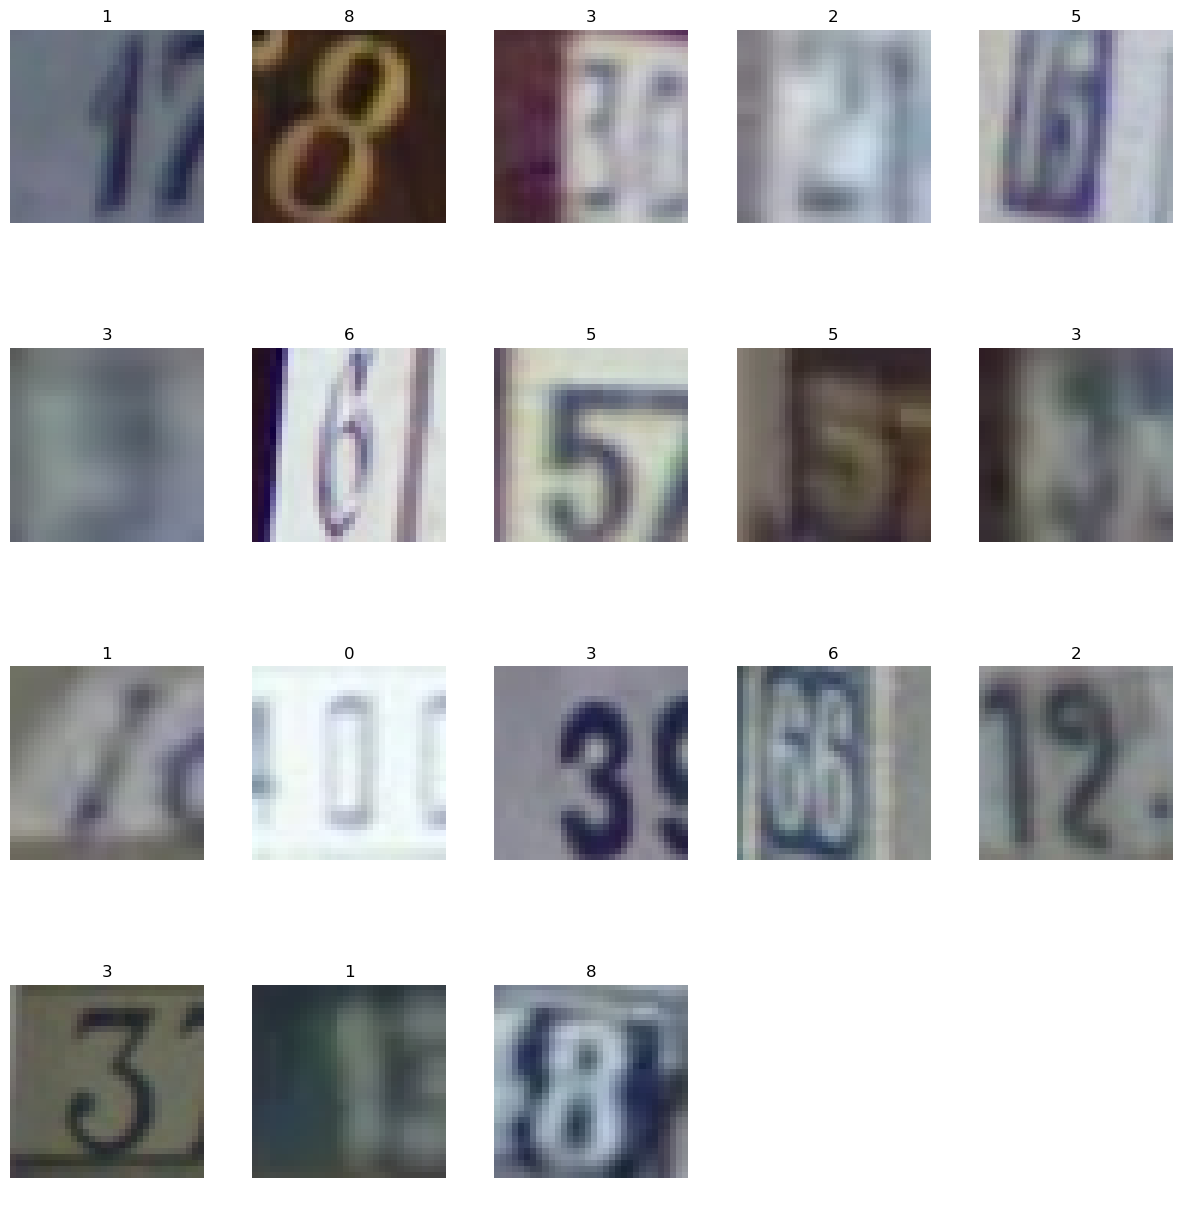

In [31]:
# mostrar una imagen
def mostrar_img(img, y):
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.axis('off')   # quita los ejes
    plt.title(y)
    plt.show()
# for i in range(6): mostrar_img(X_train[i],y_train[i])

# muestra varias imagenes a la vez (solo con el for quedaba muy feo)
def listar_imgs(imgs_arr, y_arr, pred_arr):
    n_fila = int(np.ceil((len(imgs_arr))/5))
    fig,ax = plt.subplots(n_fila,5, figsize=(15,n_fila*4))
    ax = ax.flatten()
    # aniadimos las imagenes al grafico
    for i, img in enumerate(imgs_arr):
        title_txt = y_arr[i]
        if pred_arr is not None: 
            title_txt = '{}  Sol:{}'.format(pred_arr[i],title_txt)           
        ax[i].set_title(title_txt)
        ax[i].imshow(img, cmap="gray")
        ax[i].axis("off") 
    # eliminamos los huecos vacios
    for ax_vacio in ax[len(imgs_arr):]:  ax_vacio.axis("off")
    plt.subplots_adjust(wspace=0.25, hspace=0.15)   # ajusta los margenes para separar las imágenes 
    plt.show()

listar_imgs(X_train[:18], y_train[:18],None)   

In [3]:
# valores de y
values,count = np.unique(y_train,return_counts=True)
for y, cant in zip(values,count):
    print(y,' --> ',cant)

1  -->  11782
2  -->  8997
3  -->  7222
4  -->  6339
5  -->  5850
6  -->  4868
7  -->  4756
8  -->  4288
9  -->  3960
10  -->  4206


### Preparar

0  -->  4206
1  -->  11782
2  -->  8997
3  -->  7222
4  -->  6339
5  -->  5850
6  -->  4868
7  -->  4756
8  -->  4288
9  -->  3960
[[[0.40392157 0.43137255 0.49019608]
  [0.40392157 0.43137255 0.49411765]
  [0.41176471 0.43921569 0.50196078]
  ...
  [0.27843137 0.31372549 0.38431373]
  [0.25882353 0.30588235 0.37254902]
  [0.24705882 0.29803922 0.36470588]]

 [[0.40784314 0.43921569 0.49411765]
  [0.41176471 0.43921569 0.49803922]
  [0.40784314 0.44313725 0.50196078]
  ...
  [0.20784314 0.23921569 0.3372549 ]
  [0.16862745 0.20392157 0.29803922]
  [0.14901961 0.18431373 0.27843137]]

 [[0.41176471 0.45098039 0.49803922]
  [0.41176471 0.45490196 0.50196078]
  [0.41176471 0.45098039 0.49803922]
  ...
  [0.15294118 0.16862745 0.28627451]
  [0.1254902  0.14117647 0.25490196]
  [0.12156863 0.14117647 0.25490196]]

 ...

 [[0.41176471 0.43529412 0.49803922]
  [0.40392157 0.43137255 0.49411765]
  [0.40784314 0.43137255 0.50196078]
  ...
  [0.36470588 0.37647059 0.45882353]
  [0.4        0.415

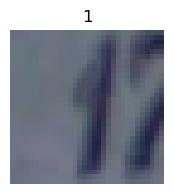

In [9]:
# la solucion de 0 tiene que ser 0, no 10
y_train = np.where(y_train == 10, 0, y_train)
y_val = np.where(y_val == 10, 0, y_val)
y_test = np.where(y_test == 10, 0, y_test)

# normalizar 
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

# comprobacion
values,count = np.unique(y_train,return_counts=True)
for y, cant in zip(values,count):
    print(y,' --> ',cant)
print(X_train[0])
mostrar_img(X_train[0],y_train[0])

### Crear y entrenar

In [33]:
# deteccion temprana
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_3_3_checkpoints.weights.h5", save_weights_only=True)

modelos = []
history = []
rangos = [3e-4, 5e-4, 5e-3]
for lr in rangos:
    # crear
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1:]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(248, activation="relu"),
        tf.keras.layers.Dense(124, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")  
    ])
    # compilar
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),   #  asignar tasa de aprendizaje
                metrics=['accuracy'])
    # entrenar
    hist = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), 
                    callbacks=[checkpoint_cb,early_stopping_cb])
    modelos.append(model)
    history.append(hist)


Epoch 1/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.1986 - loss: 2.2199 - val_accuracy: 0.4002 - val_loss: 1.7439
Epoch 2/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4739 - loss: 1.5593 - val_accuracy: 0.5860 - val_loss: 1.2859
Epoch 3/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.5996 - loss: 1.2549 - val_accuracy: 0.6442 - val_loss: 1.1403
Epoch 4/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6454 - loss: 1.1245 - val_accuracy: 0.6883 - val_loss: 1.0352
Epoch 5/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6746 - loss: 1.0491 - val_accuracy: 0.6603 - val_loss: 1.0888
Epoch 6/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6907 - loss: 0.9968 - val_accuracy: 0.6386 - val_loss: 1.1221
Epoch 7/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7087 - loss: 0.9480 - val_accuracy: 0.7135 - val_loss: 0.9322
Epoch 8/40
1946/1946 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7167 - loss: 0

### Evaluar

In [34]:
mejor_acc = 0
mejor_mod = None
mejor_hist = None
i = 0
for model in modelos:
    eval_loss,eval_acc = model.evaluate(X_test,y_test)
    print('Accuracy: ',eval_acc,'  Loss: ',eval_loss)
    if eval_acc > mejor_acc:
        mejor_acc = eval_acc
        mejor_mod = model
        mejor_hist = history[i]
    i += 1

2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8375 - loss: 0.5331
Accuracy:  0.8368210792541504   Loss:  0.5374810695648193
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7824 - loss: 0.6927
Accuracy:  0.7790654897689819   Loss:  0.6979808211326599
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1905 - loss: 2.2363
Accuracy:  0.18921059370040894   Loss:  2.2373077869415283


### Grafico


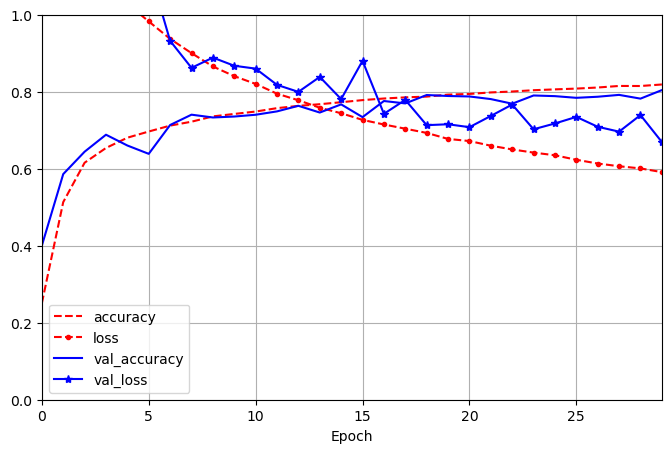

In [35]:
pd.DataFrame(mejor_hist.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend()
plt.show()

### Predecir

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


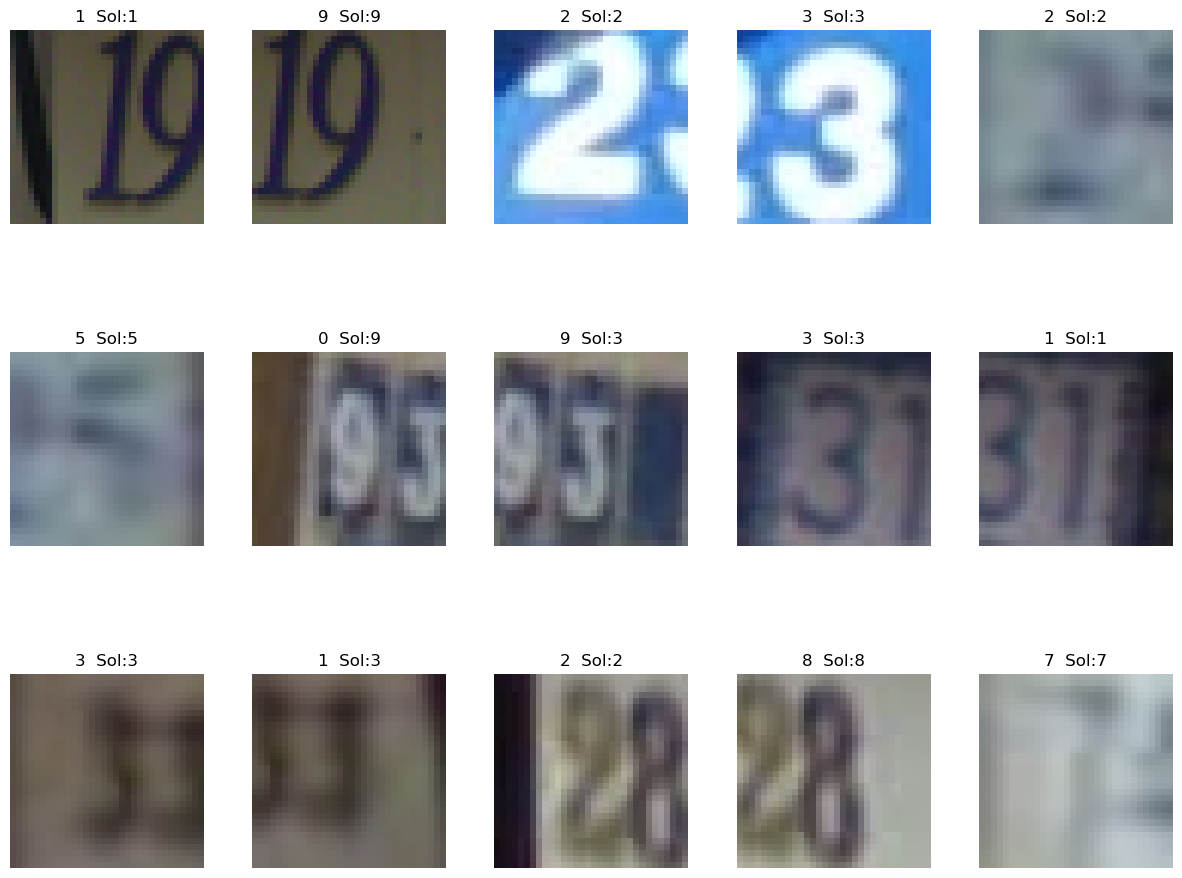

In [36]:
# predecir 15
x_prub = X_test[:15]
y_prub = y_test[:15]
y_proba = mejor_mod.predict(x_prub)
y_pred = y_proba.argmax(axis=-1)
listar_imgs(x_prub,y_prub,y_pred)

## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [11]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)
data.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.